**Student Name:** wasif Shah

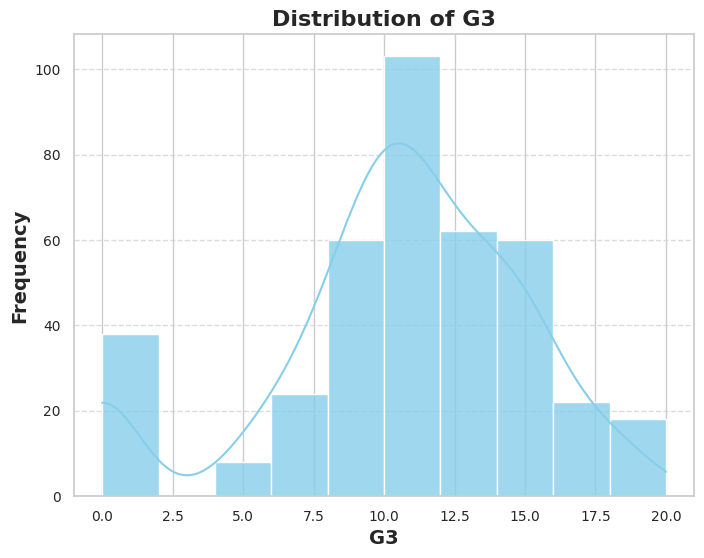

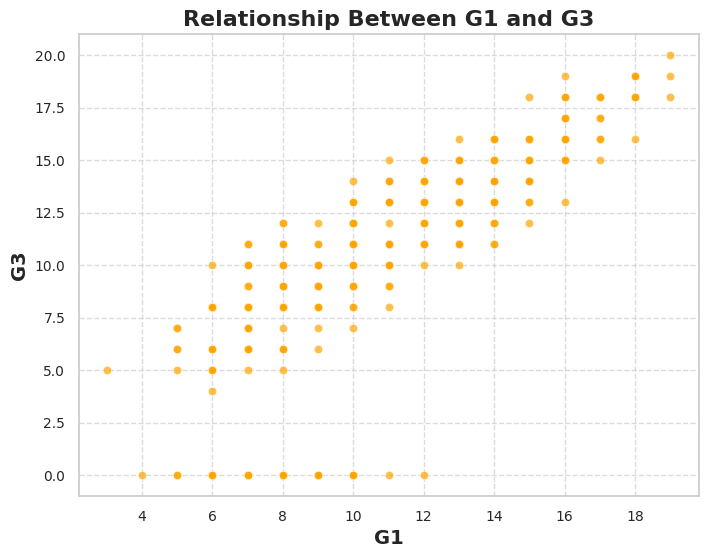

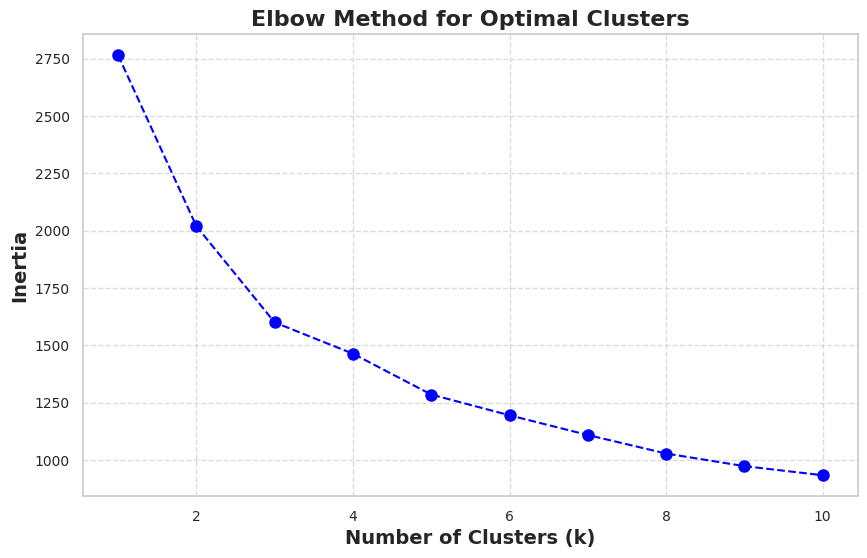

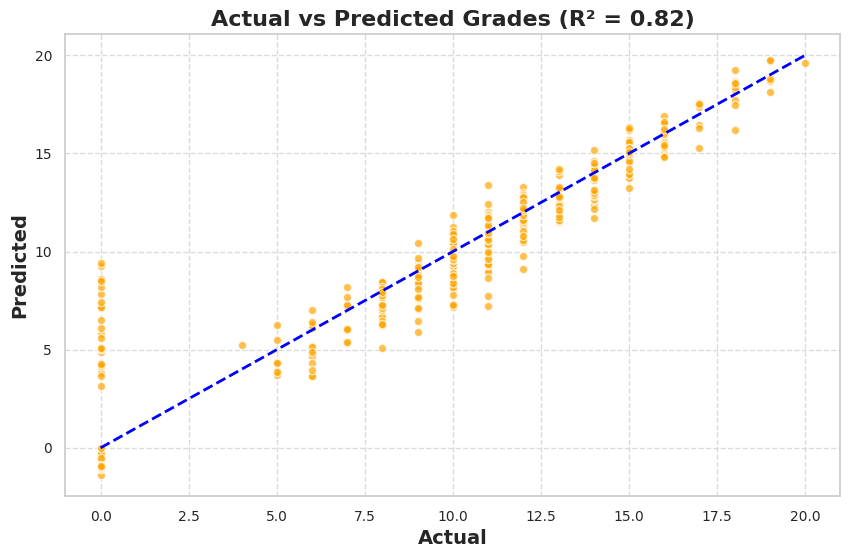

Future Predictions:
   G1  G2  freetime  goout  Walc  Dalc  G3  Predicted G3  Assigned Cluster
0  10  12         3      3     2     1  10     11.533491                 0
1  15  14         4      2     4     3  10     14.465955                 2
2   5   6         2      4     1     2  10      4.433660                 0


In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

def load_data(file_path: str) -> pd.DataFrame:
    """Load the dataset from the given file path."""
    return pd.read_csv(file_path, sep=';')

def plot_histogram(data: pd.DataFrame, column: str):
    """Plot the distribution of a specified column."""
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], bins=10, kde=True, color='skyblue', alpha=0.8)
    plt.title(f'Distribution of {column}', fontsize=16, weight='bold')
    plt.xlabel(column, fontsize=14, weight='bold')
    plt.ylabel('Frequency', fontsize=14, weight='bold')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

def plot_scatter(data: pd.DataFrame, x_col: str, y_col: str):
    """Plot scatter between two specified columns."""
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=x_col, y=y_col, alpha=0.7, color='orange', edgecolor='w')
    plt.title(f'Relationship Between {x_col} and {y_col}', fontsize=16, weight='bold')
    plt.xlabel(x_col, fontsize=14, weight='bold')
    plt.ylabel(y_col, fontsize=14, weight='bold')
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.show()

def perform_clustering(data: pd.DataFrame, features: list, n_clusters: int = 3) -> KMeans:
    """Perform KMeans clustering on the specified features."""
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data[features])
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data['Cluster'] = kmeans.fit_predict(data_scaled)
    return kmeans, scaler

def plot_elbow(data: pd.DataFrame, features: list):
    """Plot the elbow method to determine the optimal number of clusters."""
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data[features])
    inertia = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data_scaled)
        inertia.append(kmeans.inertia_)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), inertia, marker='o', linestyle='--', color='blue', markersize=8)
    plt.title('Elbow Method for Optimal Clusters', fontsize=16, weight='bold')
    plt.xlabel('Number of Clusters (k)', fontsize=14, weight='bold')
    plt.ylabel('Inertia', fontsize=14, weight='bold')
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.show()

def train_regression_model(data: pd.DataFrame, predictors: list, target: str) -> LinearRegression:
    """Train a regression model to predict the target variable."""
    X = data[predictors]
    y = data[target]
    model = LinearRegression()
    model.fit(X, y)
    return model

def evaluate_regression_model(model: LinearRegression, data: pd.DataFrame, predictors: list, target: str):
    """Evaluate the regression model and plot actual vs predicted values."""
    X = data[predictors]
    y = data[target]
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    plt.figure(figsize=(10, 6))
    plt.scatter(y, y_pred, alpha=0.7, color='orange', edgecolor='w')
    plt.plot([min(y), max(y)], [min(y), max(y)], color='blue', linestyle='--', linewidth=2)
    plt.title(f'Actual vs Predicted Grades (R² = {r2:.2f})', fontsize=16, weight='bold')
    plt.xlabel('Actual', fontsize=14, weight='bold')
    plt.ylabel('Predicted', fontsize=14, weight='bold')
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.show()
    return r2

def predict_future_students(model: LinearRegression, kmeans: KMeans, scaler: StandardScaler, features: list):
    """Predict grades and cluster assignments for new students."""
    new_students = pd.DataFrame({
        'G1': [10, 15, 5],
        'G2': [12, 14, 6],
        'freetime': [3, 4, 2],
        'goout': [3, 2, 4],
        'Walc': [2, 4, 1],
        'Dalc': [1, 3, 2],
        'G3': [10, 10, 10]  # Placeholder value
    })
    new_students_scaled = scaler.transform(new_students[features])
    new_students['Predicted G3'] = model.predict(new_students.drop(columns=['G3']))
    new_students['Assigned Cluster'] = kmeans.predict(new_students_scaled)
    print("Future Predictions:")
    print(new_students)

# Main execution flow
file_path = "/content/student performance/inner_dataset/student-mat.csv"  # Adjust the file path as needed
math_data = load_data(file_path)

# Plot distributions and relationships
plot_histogram(math_data, 'G3')
plot_scatter(math_data, 'G1', 'G3')

# Clustering
features = ['G1', 'G2', 'freetime', 'goout', 'Walc', 'Dalc', 'G3']
plot_elbow(math_data, features)
kmeans, scaler = perform_clustering(math_data, features)

# Regression
predictors = ['G1', 'G2', 'freetime', 'goout', 'Walc', 'Dalc']
model = train_regression_model(math_data, predictors, 'G3')
r2 = evaluate_regression_model(model, math_data, predictors, 'G3')

# Future Predictions
predict_future_students(model, kmeans, scaler, features)
